In [1]:
import psycopg2
import pandas as pd
import numpy as np

# Set up database connection parameters
dbname = "e-commerce_schema"
user = "postgres"
password = "postgres"
host = "localhost"  # or the IP address of your database server
port = "5432"       # default PostgreSQL port

# Establish a connection to the database
try:
    connection = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    print("Database connection established.")
    
    # Create a cursor object using the connection
    cursor = connection.cursor()
    
    # Execute a query
    cursor.execute("SELECT version();")
    db_version = cursor.fetchone()
    print("PostgreSQL version:", db_version)
    
   

except Exception as e:
    print("An error occurred:", e)

Database connection established.
PostgreSQL version: ('PostgreSQL 14.11, compiled by Visual C++ build 1937, 64-bit',)


In [2]:
# Selecting all the rows from the table
cursor.execute("SELECT * FROM ecommerce_transactions;")

# Fetch all rows from the result
rows = cursor.fetchall()

# Get column names
column_names = [desc[0] for desc in cursor.description]

In [3]:
# Create dataframe
ecomm_transactions_df = pd.DataFrame(rows, columns=column_names)

ecomm_transactions_df.head()

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,IP_address,shipping_address,billing_address,is_fraudulent,account_age_days,transaction_hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [4]:
ecomm_transactions_df['shipping_address'] = ecomm_transactions_df['shipping_address'].str.replace('\n', ', ')
ecomm_transactions_df['billing_address'] = ecomm_transactions_df['billing_address'].str.replace('\n', ', ')
ecomm_transactions_df.head()


,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,IP_address,shipping_address,billing_address,is_fraudulent,account_age_days,transaction_hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,"Unit 8934 Box 0058, DPO AA 05437","Unit 8934 Box 0058, DPO AA 05437",0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys, Port Cherylview, NV 75063","634 May Keys, Port Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790, Rothhaven, IL 15564","16282 Dana Falls Suite 790, Rothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646, New Joshua, UT 84798","828 Strong Loaf Apt. 646, New Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439, West Richardtown, ...","29799 Jason Hills Apt. 439, West Richardtown, ...",0,158,5


In [5]:
# Categorizing the transactions by seasons (Spring or Winter) - creating a new column with the corresponding seasons 
def categorize_season(transaction_date):
    transaction_date = pd.Timestamp(transaction_date)
    if spring_begin <= transaction_date <= spring_end:
        return 'Spring'
    elif transaction_date >= winter_begin or transaction_date <= winter_end:
        return "Winter"

winter_begin = pd.Timestamp('2023-12-01')
winter_end = pd.Timestamp('2023-03-19')
spring_begin = pd.Timestamp('2024-03-20')
spring_end = pd.Timestamp('2024-06-20')

ecomm_transactions_df['Seasons'] = ecomm_transactions_df['transaction_date'].apply(categorize_season)
seasons_df = ecomm_transactions_df.groupby("Seasons")
seasons_df.head()

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,IP_address,shipping_address,billing_address,is_fraudulent,account_age_days,transaction_hour,Seasons
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,"Unit 8934 Box 0058, DPO AA 05437","Unit 8934 Box 0058, DPO AA 05437",0,30,5,Winter
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys, Port Cherylview, NV 75063","634 May Keys, Port Cherylview, NV 75063",0,72,8,Winter
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790, Rothhaven, IL 15564","16282 Dana Falls Suite 790, Rothhaven, IL 15564",0,63,3,Winter
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646, New Joshua, UT 84798","828 Strong Loaf Apt. 646, New Joshua, UT 84798",0,124,20,Winter
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439, West Richardtown, ...","29799 Jason Hills Apt. 439, West Richardtown, ...",0,158,5,Winter
22,402da312-6957-47a7-b513-40eb4a1c614e,1967927c-2316-420b-ab36-8f34b5632463,123.35,2024-04-02,debit card,toys & games,1,35,Port Christopher,desktop,199.73.51.223,"5146 Desiree Ridge, Steeleburgh, MH 56289","5146 Desiree Ridge, Steeleburgh, MH 56289",0,20,19,Spring
33,4fef0df1-e9d7-41b8-b4ca-88f60632b729,221ff13a-1429-47b7-a6ca-bac1a035bdea,141.89,2024-03-29,debit card,clothing,3,32,Robbinsport,mobile,206.94.162.125,"642 Moss Wall Suite 362, Port Toddstad, VT 92434","642 Moss Wall Suite 362, Port Toddstad, VT 92434",0,334,4,Spring
48,35195f37-170f-4ae5-ad99-092744672112,7a355522-c78b-45dd-b221-2cd671231b4f,361.22,2024-03-24,debit card,electronics,3,36,Reyesberg,tablet,213.204.202.116,"Unit 5336 Box 4045, DPO AP 14921","Unit 5336 Box 4045, DPO AP 14921",0,233,15,Spring
52,d4539b2d-2b55-4b42-b8cd-cd5a6603b486,c1d0af10-418f-457c-a362-eb191b5ca5ef,268.30,2024-03-25,credit card,health & beauty,4,48,South Michelle,desktop,205.79.162.144,"5271 Russell Turnpike, New Andrew, AL 33616","5271 Russell Turnpike, New Andrew, AL 33616",0,1,8,Spring
55,147607a9-e7cc-4050-9c0a-8cb798e8f4af,80624244-ceb2-4bba-9e42-a9c3ff6565f4,556.02,2024-03-30,credit card,toys & games,5,16,East Ashley,tablet,111.198.106.134,"0283 Booker Row Suite 784, Johnton, MO 52366","0283 Booker Row Suite 784, Johnton, MO 52366",0,132,12,Spring


In [6]:
# Getting all the product categories

# Get unique records of the 'Category' column
unique_categories = ecomm_transactions_df['product_category'].unique()

# Create a new DataFrame with the unique records
product_cat_df = pd.DataFrame({'product_category': unique_categories})

product_cat_df

,product_category
0,electronics
1,home & garden
2,clothing
3,toys & games
4,health & beauty


In [7]:
# how many times does a fraudulent transaction occur in each category 

# Group by 'Category' and sum the values in 'True_False_Column'
result = ecomm_transactions_df.groupby('product_category')['is_fraudulent'].sum()

result_df = pd.DataFrame(result)

result_df.head()


,is_fraudulent
product_category,
clothing,10718
electronics,10625
health & beauty,10775
home & garden,10815
toys & games,10809


In [8]:
# how many times does a fraudulent transaction occur in each category by season 
season_result = ecomm_transactions_df.groupby(['Seasons', 'product_category'])['is_fraudulent'].sum()
season_result_df = pd.DataFrame(season_result)
season_result_df

is_fraudulent
Seasons product_category               
Spring  clothing                   1592
        electronics                1622
        health & beauty            1672
        home & garden              1704
        toys & games               1664
Winter  clothing                   9126
        electronics                9003
        health & beauty            9103
        home & garden              9111
        toys & games               9145

In [9]:
#seperating spring fraud transactions

season_result = ecomm_transactions_df.groupby(['Seasons', 'product_category'])['is_fraudulent'].sum()
season_result_df = pd.DataFrame(season_result)
season_result_df

spring_df = season_result_df.loc['Spring']
spring_df

,is_fraudulent
product_category,
clothing,1592
electronics,1622
health & beauty,1672
home & garden,1704
toys & games,1664


In [10]:
#seperating winter fraud transactions

winter_df = season_result_df.loc['Winter']
winter_df

,is_fraudulent
product_category,
clothing,9126
electronics,9003
health & beauty,9103
home & garden,9111
toys & games,9145


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt

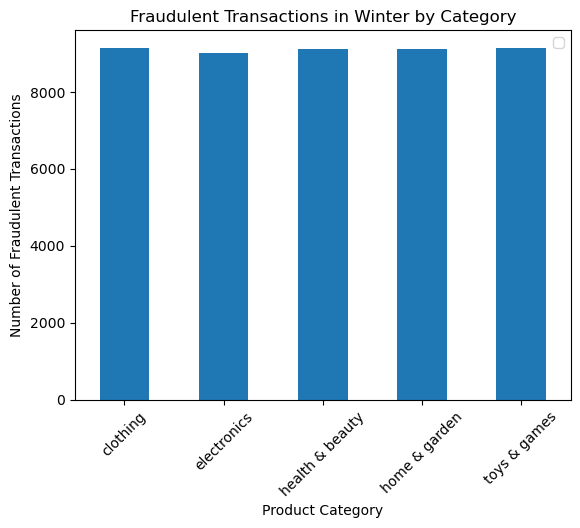

In [13]:

# Convert boolean values to 1s and 0s
winter_df['is_fraudulent_numeric'] = winter_df['is_fraudulent'].astype(int)

# Group by 'product_category' and calculate the mean of 'is_fraudulent_numeric'
grouped_df = winter_df.groupby('product_category')['is_fraudulent_numeric'].mean().reset_index()

# Plot the data
grouped_df.plot(x='product_category', y='is_fraudulent_numeric', kind='bar', title='Fraudulent Transactions in Winter by Category')
plt.ylabel('Number of Fraudulent Transactions')  
plt.xlabel('Product Category')
plt.xticks(rotation=45)  
plt.gca().legend([])
plt.show()

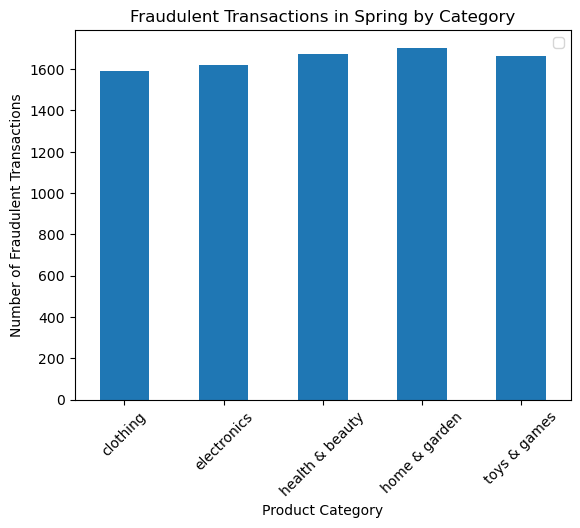

In [18]:
spring_df['is_fraudulent_numeric'] = spring_df['is_fraudulent'].astype(int)

# Group by 'product_category' and calculate the mean of 'is_fraudulent_numeric'
grouped_df = spring_df.groupby('product_category')['is_fraudulent_numeric'].mean().reset_index()

# Plot the data
grouped_df.plot(x='product_category', y='is_fraudulent_numeric', kind='bar', title='Fraudulent Transactions in Spring by Category')
plt.ylabel('Number of Fraudulent Transactions')  
plt.xlabel('Product Category')
plt.xticks(rotation=45)  
plt.gca().legend([])
plt.show()

In [16]:
 # Close the cursor and connection
cursor.close()
connection.close()